**Author:** Anowar Shajib, Mir Sazzat Hossain

In [21]:
import glob

import coloripy as cp
import h5py
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import paperfig as pf
import seaborn as sns
from lenstronomy.Plots import plot_util

## Plot settings

In [22]:
save_figure = True

In [23]:
pf.set_fontscale(2.0)


# for MNRAS
mpl.rcParams["ps.fonttype"] = 42

# to change tex to Times New Roman in mpl
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Times New Roman"
plt.rcParams["mathtext.rm"] = "serif"
plt.rcParams["mathtext.it"] = "serif:italic"
plt.rcParams["mathtext.bf"] = "serif:bold"
plt.rcParams["mathtext.fontset"] = "custom"


sns.set_theme(style="ticks", context="paper", font="Times New Roman", font_scale=2.0)
# sns.set_context('talk')
sns.set_style(
    {
        "xtick.direction": "in",
        "ytick.direction": "in",
        "axes.linewidth": 2.0,
    }
)
# sns.set_palette('Set2')

cmap = sns.cubehelix_palette(
    start=0.5,
    rot=-1.5,
    gamma=1,
    hue=1,
    light=-0.6,
    dark=0.8,
    reverse=False,
    as_cmap=True,
)
cmap2 = sns.cubehelix_palette(
    start=0.5,
    rot=-1.5,
    gamma=1,
    hue=1,
    light=-0.2,
    dark=1.0,
    reverse=False,
    as_cmap=True,
)

msh_cmap = cp.get_msh_cmap(num_bins=501, rescale="power", power=2.5)

# Plot

In [24]:
lens_folders = glob.glob("../lens_systems/*")

system_names = [
    "DESIJ0132-1600",
    "DESIJ0136-0008",
    "DESIJ0201-2739",
    "DESIJ0215-2909",
    "DESIJ0618+5018",
    "DESIJ0923+1829",
    "DESIJ1018-0121",
    "DESIJ1101-0602",
    "DESIJ1205+4110",
    "DESIJ1501+5208",
    "DESIJ1537+1443",
    "DESIJ1554+0443",
    "DESIJ1624+0129",
    "DESIJ1709+3154",
    "DESIJ2158+0257",
]

len(system_names)

15

In [25]:
def load_image_data(system_name):
    """
    Load image data from HDF5 file.

    :param system_name: name of the lens system
    :type system_name: str
    :return: image data
    :rtype: numpy.ndarray
    """
    file_path = f"../lens_systems/{system_name}/{system_name}_F140W.h5"

    with h5py.File(file_path, "r") as f:
        kwargs_data = {key: f[key][()] for key in f}

    return kwargs_data["image_data"]


def load_transform_pix2angle(system_name):
    """
    Load transform_pix2angle from HDF5 file.

    :param system_name: name of the lens system
    :type system_name: str
    :return: transform_pix2angle
    :rtype: numpy.ndarray
    """
    file_path = f"../lens_systems/{system_name}/{system_name}_F140W.h5"

    with h5py.File(file_path, "r") as f:
        kwargs_data = {key: f[key][()] for key in f}

    return kwargs_data["transform_pix2angle"]

In [62]:
def plot_one_system(ax, system_name, text_arc=None):
    """
    Plot image of one lens system.

    :param system_name: name of the lens system
    :type system_name: str
    :return: None
    :rtype:
    """
    image_data = load_image_data(system_name)
    image_data[image_data < 0] = np.min(np.abs(image_data))

    ax.matshow(np.log10(image_data), vmin=-6, vmax=1.5, cmap=cmap, origin="lower")
    ax.set_xticks([])
    ax.set_yticks([])

    # Adjust the position and alignment of the text
    ax.text(
        0.13,
        1.1,
        system_name,
        transform=ax.transAxes,
        fontsize=20,  # Adjust as per `pf.mnras_text_fontsize`
        color="black",
        va="top",
        ha="left",
        # bbox=dict(facecolor="k", alpha=0.90, edgecolor="none"),
    )

    t_p2a = load_transform_pix2angle(system_name)

    # Calculate the length of the ruler in pixels
    arcsec_per_pixel = np.diag(t_p2a)[0]
    ruler_length_arcsec = -1 / arcsec_per_pixel  # Length of the scale bar in arcseconds

    # Add scale bar using lenstronomy's utility function
    plot_util.scale_bar(
        ax, 50, dist=ruler_length_arcsec, text=" {}".format(text_arc), font_size=25
    )

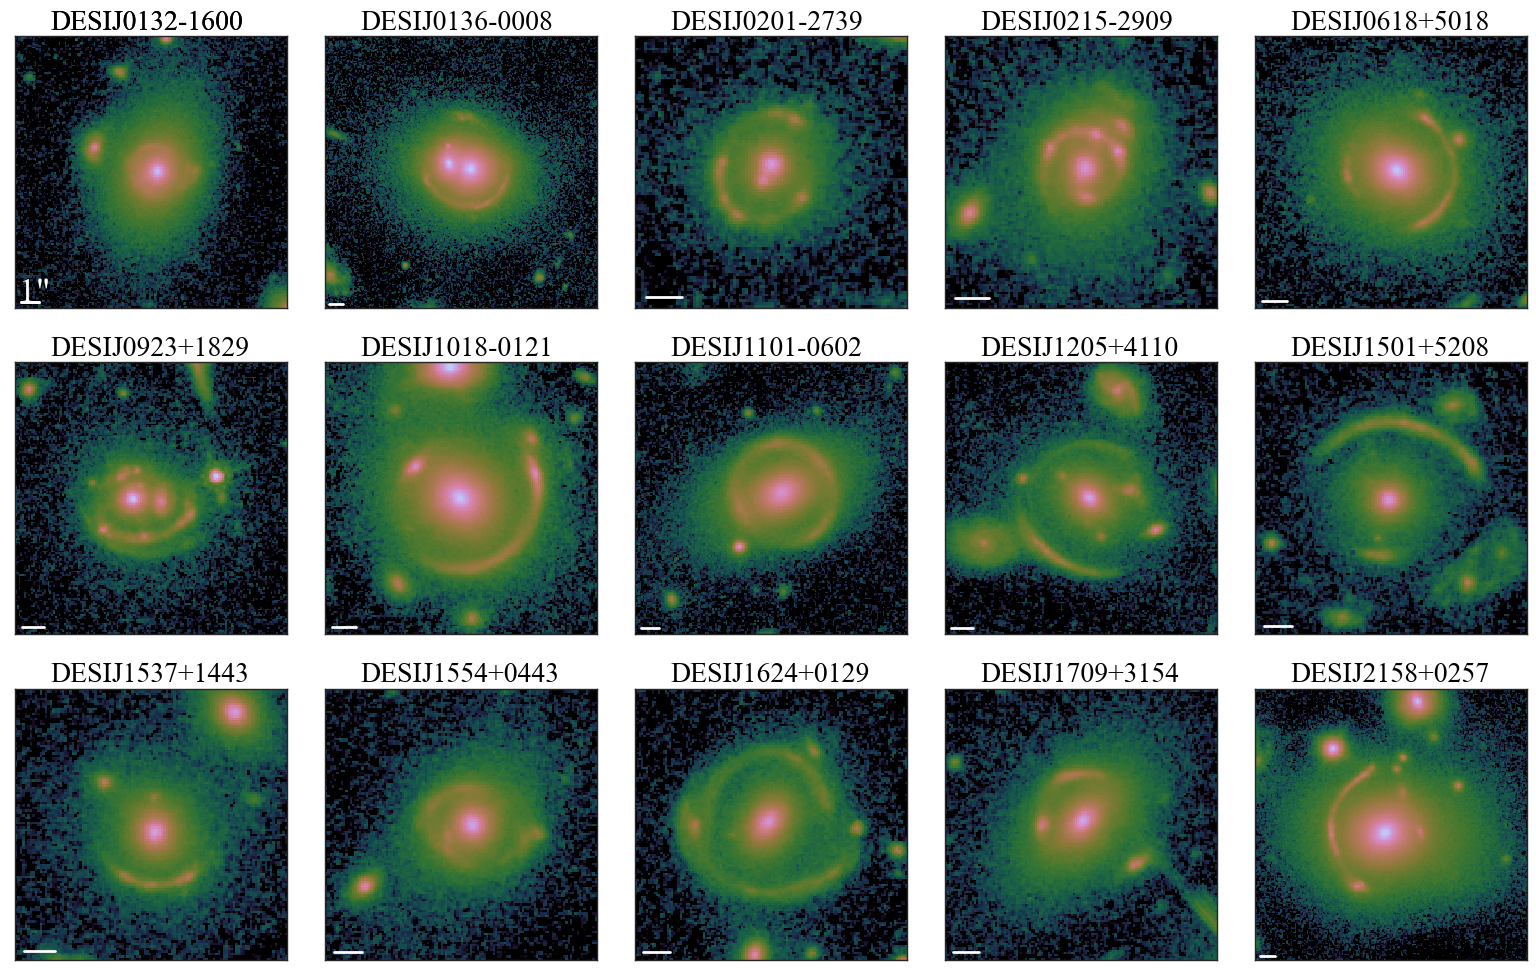

In [63]:
num_col = 5
num_row = (len(system_names) - 1) // num_col + 1
save_figure = True

fig, axes = plt.subplots(
    num_row, num_col, figsize=(20, 4 * num_row)
)  # Adjust figure size as necessary

for i, ax in enumerate(axes.flatten()):
    if i == 0:
        plot_one_system(ax, system_names[i], text_arc='1"')
    if i < len(system_names):
        plot_one_system(ax, system_names[i], text_arc="")
    else:
        ax.axis("off")

fig.subplots_adjust(hspace=0.2, wspace=0.00)

if save_figure:
    fig.savefig("../paper/figures/lens_montage.pdf", bbox_inches="tight")

plt.show()